# Hotel Booking Cancel Analysis
made by : Shendy Gunawan

<center><img src='https://images.solopos.com/2019/11/Ilustrasi-hotel.-Freepik.jpg'/></center>

<h1 class="list-group-item list-group-item-action active" data-toggle="list" role="tab" aria-controls="home">TABLE OF CONTENT</h1>

<a id="toc"></a>

Table of Content

[1. Business Understanding](#1)  
[2. Library](#2)  
[3. Data Understanding](#3)  
&nbsp;&nbsp;[3.1. Feature Check](#3a)  
&nbsp;&nbsp;[3.2. Data Exploration](#3b)  
[4. Data Analysis](#4)  
&nbsp;&nbsp;[4.1. Base Model Evaluation](#4a)  
&nbsp;&nbsp;&nbsp;&nbsp;[4.1.1 Benchmarking Basic](#4aa)  
&nbsp;&nbsp;&nbsp;&nbsp;[4.1.2 Benchmarking Undersampling](#4ab)  
&nbsp;&nbsp;&nbsp;&nbsp;[4.1.3 Benchmarking Oversampling](#4ac)  
&nbsp;&nbsp;[4.2. Hyperparameter Tuning](#4b)  
&nbsp;&nbsp;&nbsp;&nbsp;[4.2.1 Hyperparameter Tuning Decision Tree Classifier](#4ba)  
&nbsp;&nbsp;&nbsp;&nbsp;[4.2.2 Benchmarking Tuning Random Forest Classifier](#4bb)  
&nbsp;&nbsp;&nbsp;&nbsp;[4.2.3 Benchmarking Tuning XGB Classifier](#4bc)  
&nbsp;&nbsp;[4.3 Feature Importance](#4c)  
&nbsp;&nbsp;&nbsp;&nbsp;[4.3.1 Best Model with Current Feature](#4ca)  
&nbsp;&nbsp;&nbsp;&nbsp;[4.3.2 Best Model after Feature Importance](#4cb)  
&nbsp;&nbsp;&nbsp;&nbsp;[4.3.1 Feature Importance Summary](#4cc)  
[5. Conclusion](#5) 

# <font color=#DD7A4B size=+5><b>1. Business Understanding</b></font>
<a id="1"></a>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:gray" data-toggle="popover">Table of Contents</a>

**Context**
> **Hospitality Industry**  
> *Revenue Management* merupakan sebuah konsep yang diadopsi industri perhotelan, yang dapat diartikan sebagai *"making the right room available for the right guest and the right price at the right time via the right distribution channel"*. Sistem manajemen ini yang menyebabkan harga dapat berubah dari waktu ke waktu, dengan tujuan memaksimalkan komoditas yang dijual, dalam hal ini berupa sebuah kamar.  
>
> Dikarenakan hotel memiliki jumlah kamar yang tetap dan kamar memiliki umur pakai yang terbatas, maka dalam mencari pelanggan yang tepat, di waktu yang tepat, dan harga yang tepat untuk kamar tersebut, hotel menerima booking di muka / depan. Booking dapat direpresentasikan sebagai perjanjian antara pelanggan dan pihak hotel yang dapat memenuhi kriteria di atas.
>
> **Cancel Booking**  
> Pada Umumnya sistem booking ini datang dengan pilihan, pelanggan dapat membatalkan booking (cancel booking) yang telah dibuat. Akan tetapi hal ini membuat pihak hotel rugi dikarenakan *loss of income*, apalagi jika pemberitahuan cancel booking sangat dekat dengan jadwal booking. Pihak hotel terpaksa mencari pelanggan baru dengan waktu yang lebih sempit, dan seringkali harus mendiskon kamar tersebut. Ketika status kamar sudah terisi, pihak hotel tidak dapat menawarkan kamar tersebut yang berarti menolak calon pembeli lain.
>
>  Terdapat beberapa cara yang telah diterapkan untuk mencegah cancel booking, seperti menentukan jumlah maksimal cancel booking dari hari check-in atau menerapkan *cancelation fee*. Akan tetapi cara ini dinilai tidak efektif, selain dapat menurunkan potensi kedatangan pelanggan, juga dapat membuat nama hotel terlihat buruk.

**Problem Statement**  
Cancel Booking merupakan fenomena yang merugikan insdustri perhotelan. Hal ini menyebabkan hotel tidak mendapatkan calon pembeli, kesalahan dalam pengaturan sumberdaya (staff, stocking barang, dan lainnya), memberi harga kamar yang lebih murah, kemungkinan menurunkan nama baik hotel.

**Objective**  
Jika industri perhotelan dapat mengetahui pelanggan mana saja yang akan cancel dan tidak, maka pihak hotel dapat mengambil langkah preventif dan dapat mengalokasikan dana serta sumber daya pada waktu dan orang yang tepat. Hotel dapat menawarkan layanan tambahan / diskon terhadap pelanggan yang berpotensi cancel atau juga menempatkan biaya marketing pada orang yang tepat.

**Approach**  
Akan dilakukan prediksi pelanggan menggunakan metode 'machine learning' untuk mengetahui probabilitas pelanggan mana yang akan melakukan cancel booking dan juga tidak

**Metrics**  
![](https://pbs.twimg.com/media/EjOMMh9U8AErtpx.jpg)

> *Target*  
> 1 : Pelanggan Cancel Booking  
> 0 : Pelanggan tidak Cancel Booking  
>
> *Statement*
> - True Positive    : Pelanggan cancel booking, DAN terprediksi cancel booking
> - False Positive   : Pelanggan tidak cancel, TETAPI terprediksi cancel booking
> - True Negative    : Pelanggan tidak cancel, DAN terprediksi tidak cancel booking
> - False Negative   : Pelanggan cancel booking, TETAPI terprediksi tidak cancel booking
>
> *Consequences*
>> False Postive  : Pelanggan yang tidak cancel booking akan menerima perlakuan lebih berupa diskon dan fasilitas tambahan, tetapi ada kemungkinan jumlah hari booking dibatasi (maksimal beberapa hari menginap).  
>
>> False Negative : Pelanggan yang cancel booking tidak dapat kita beri perlakuan lebih, dikarenakan kamar telah terisi, berpotensi menolak calon pelanggan dan juga menurunkan harga kamar untuk mencari pelanggan pengganti.
>
> *Metrics Choice*  
> Pada False negative, terdapat kemungkinan bahwa hotel akan membatasi jumlah hari menginap yang dapat menurunkan reputasi hotel dan juga menolak calon pelanggan. Hal ini beresiko besar dan baru bisa kita terapkan jika kita yakin bahwa pelanggan akan cancel. Taktik ini belum tentu diterapkan dan hanya diterapkan sebagai jalan terakhir.  
>
> Maka analisa ini akan fokus untuk menekan angka False Negative yang lebih berpotensi merugikan pihak hotel. Metrics yang akan dipakai adalah `recall`, dimana jika angka False Negatice semakin kecil maka nilai recall semakin besar

<center>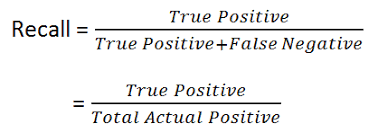</center>

**Source**  
Sumber 1: https://www.redalyc.org/pdf/3887/388751309003.pdf  
Sumber 2: https://www.mirai.com/blog/cancellations-shooting-up-implications-costs-and-how-to-reduce-them/  
Sumber 3: https://www.iunera.com/kraken/interviews/what-you-need-to-know-about-hotel-booking-cancellations-big-data/

# <font color=#DD7A4B size=+5><b>2. Library</b></font>
<a id="2"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:gray" data-toggle="popover">Table of Contents</a>

In [468]:
# Importing all that fun stuff
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# For Data Exploration
import sweetviz

# Tools for Benchmarking
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV

# Importing resampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTENC

# Importing Encoder & Scaler
from sklearn.preprocessing import OneHotEncoder, RobustScaler

# Importing Metrics
from sklearn.metrics import recall_score, classification_report

# Importing Model
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree # <- this one for making a tree
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from xgboost.sklearn import XGBClassifier

# Tools for composing
from sklearn.compose import ColumnTransformer
from imblearn.pipeline import Pipeline

# for pickling
import pickle

# show all columns on pandas dataframe
pd.set_option("display.max_columns", None)

# show all value in columns, wider columns
pd.set_option("max_colwidth", 0)

# <font color=#DD7A4B size=+5><b>3. Data Understanding</b></font>
<a id="3"></a>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:gray" data-toggle="popover">Table of Contents</a>

**Dataset Source**   
Kaggle : https://www.kaggle.com/datasets/jessemostipak/hotel-booking-demand  
Sciencedirect : https://www.sciencedirect.com/science/article/pii/S2352340918315191#bib6  

In [214]:
# Load Dataset
df = pd.read_csv('data_hotel_booking_demand.csv')
df.head()

,country,market_segment,previous_cancellations,booking_changes,deposit_type,days_in_waiting_list,customer_type,reserved_room_type,required_car_parking_spaces,total_of_special_requests,is_canceled
0,IRL,Offline TA/TO,0,0,No Deposit,0,Transient-Party,A,0,0,0
1,FRA,Online TA,0,0,No Deposit,0,Transient,A,0,2,0
2,PRT,Online TA,0,1,No Deposit,0,Transient,A,0,2,0
3,NLD,Online TA,0,0,No Deposit,0,Transient,A,0,1,1
4,PRT,Online TA,0,2,No Deposit,0,Transient,A,0,2,0


**Attribute Informations**

- Dataset menampilkan hotel booking dari 1 July 2015 - 31 Agustus 2017 dari 2 hotel di Portugal
- Pada dataset ini semua *value* pada kolom numerikal memiliki skala nilai yang mirip


| Attribute | Description |
| --- | --- |
|country| Kode negara dituliskan dengan format ISO 3155–3:2013 |
|market_segment| Kategori segmen pasar. “TA” artinya “Travel Agents” & “TO” artinya “Tour Operators” |
|previous_cancellations| Berapa banyak booking yang di-cancel oleh pengunjung sebelum booking ini |
|booking_changes| Berapa banyak perubahan yang dilakukan pada booking, dihitung dari booking masuk kedalam sistem perhotelan (Property Management System) sampai ke waktu check-in atau cancel |
|deposit_type| Tipe deposit yang dilakukan oleh pengunjung. Deposit dibagi menjadi 3 kategori:<br>`No Deposit` (tidak melakukan deposit sama sekali),<br>`Non Refund` (membuat deposit seharga total pembelian),<br>`Refundable` (membuat deposit kurang dari total pembelian) |
|days_in_waiting_list| Berapa banyak hari booking yang dilakukan ada di waiting list, sebelum di konfirmasi pengunjung |
|customer_type| Tipe booking, diasumsikan masuk kedalam 1 dari 4 kategori ini :<br>`Contract` (Booking yang didasari oleh kontrak);<br>`Group` (Booking dengan sistem grup);<br>`Transient` (Booking untuk menginap dalam jangka waktu pendek & tidak termasuk dalam grup ataupun kontrak);<br>`Transient-party` (Booking yang memiliki kelompok transient lainnya) |
|reserved_room_type| Kode tipe kamar pengunjung. Tipe kamar disamarkan menjadi kode |
|required_car_parking_spaces| Banyaknya tempat parkir mobil yang dibutuhkan pengunjung |
|total_of_special_requests| Banyaknya pesanan spesial dari pengunjung (contoh: twin bed atau minta lantai atas) |
|is_canceled| Angka untuk mewakili cancel atau tidak, canceled (1) atau tidak (0) |

In [215]:
# Melihat perbandingan jumlah data
print(df.value_counts('is_canceled'), end="\n\n")

print(f'presentase booking tidak cancel (0): {df.value_counts("is_canceled")[0] / len(df):.4%}')
print(f'presentase booking cancel (1): {df.value_counts("is_canceled")[1] / len(df):.4%}')

is_canceled
0    52795
1    30778
dtype: int64

presentase booking tidak cancel (0): 63.1723%
presentase booking cancel (1): 36.8277%


Value Counts  
Dari hasil value counts, perbandingan canceled (1) dan tidak cancel (0) cukup berimbang, tidak perlu resampling data

In [216]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83573 entries, 0 to 83572
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   country                      83222 non-null  object
 1   market_segment               83573 non-null  object
 2   previous_cancellations       83573 non-null  int64 
 3   booking_changes              83573 non-null  int64 
 4   deposit_type                 83573 non-null  object
 5   days_in_waiting_list         83573 non-null  int64 
 6   customer_type                83573 non-null  object
 7   reserved_room_type           83573 non-null  object
 8   required_car_parking_spaces  83573 non-null  int64 
 9   total_of_special_requests    83573 non-null  int64 
 10  is_canceled                  83573 non-null  int64 
dtypes: int64(6), object(5)
memory usage: 7.0+ MB


info
- Terdapat missing value pada kolom `Country`
- Tipe data sesuai dengan feature nya

## <font color=#DD7A4B size=+4><b>3.1. Feature Check</b></font>
<a id="3a"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:gray" data-toggle="popover">Table of Contents</a>

### Missing Value

In [217]:
print(df.isna().sum())
print(f"Presentase Missing Value : {df['country'].isna().sum()/len(df):.4%}")

country                        351
market_segment                 0  
previous_cancellations         0  
booking_changes                0  
deposit_type                   0  
days_in_waiting_list           0  
customer_type                  0  
reserved_room_type             0  
required_car_parking_spaces    0  
total_of_special_requests      0  
is_canceled                    0  
dtype: int64
Presentase Missing Value : 0.4200%


Missing Value  
Jumlah missing Value pada kolom country sebanyak 351 dengan presentase sebesar 0,42%  
Dikarenakan presentase missing value yang kecil, maka row yang memiliki missing value akan di drop  

> Note:  
> Dikarenakan pada analisa berikutnya kolom `country` akan di-binning ke 6 benua maka cara ini dapat dilakukan.  
> Jika kolom `country` tidak di-binning maka drop row sebaiknya tidak dilakukan, karena terdapat value dengan jumlah frekuensi yang lebih kecil dari 351. Dengan melakukan drop, negara tersebut dapat tidak terwakilkan sama sekali.


In [218]:
# Drop Missing Value
df.dropna(inplace=True)

### Outlier

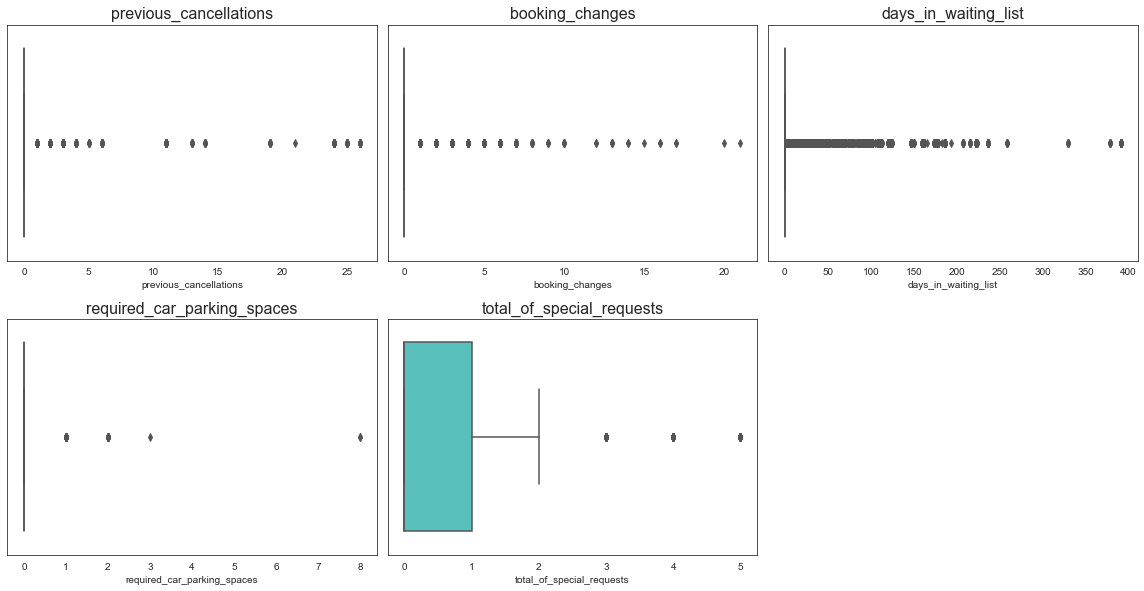

In [219]:
# Melihat persebaran data pada kolom numerikal menggunakan boxplot
# Kolom is_canceled memiliki value binary sehingga tidak perlu dimasukan boxplot

col_name = list(df.select_dtypes(include='int').columns[:-1])   # list berisi nama kolom numerikal kecuali 'is_canceled'

plt.figure(figsize=(16, 12), facecolor='white')
plotnumber = 1
    
for feature in col_name:                                        # Menampilkan boxplot untuk setiap kolom
    ax = plt.subplot(3,3, plotnumber)
    sns.boxplot(x=feature, data=df, color='mediumturquoise');
    plt.title(feature, fontsize=16)
    plt.tight_layout()
    plotnumber += 1

Boxplot Kolom Numerikal  
- Kolom `previous_cancellations`, `booking_changes`, `days_in_waiting_list`, `required_car_parking_spaces`, sebagian besar value bernilai 0
- Setiap kolom memiliki outlier, kolom `days_in_waiting_list` memiliki outlier yang besar  
- Pelanggan banyak memiliki *special request*   
Untuk mengetahui proporsi outlier, akan dilanjutkan melalui analisa dibawah

In [220]:
# Mencari presentase outlier

# List kosong untuk kemudian dijadikan DataFrame
upper_bound = []
n_outlier = []
percent_outlier = []

# Loop tiap kolom numerikal untuk mencari Q1, Q3, dan IQR
for i in col_name:
    q3 = df[i].quantile(q=0.75)
    q1 = df[i].quantile(q=0.25)
    iqr = q3 - q1
    
    # lower_bound tidak dicari dikarenakan tidak terdapat outlier dibawah lower_bound
    upper = q3 + 1.5 * iqr
    upper_bound.append(upper)
    n_outlier.append(df[df[i] > upper].shape[0])
    percent_outlier.append(f'{df[df[i] > upper].shape[0]/df.shape[0]:.4%}')

pd.DataFrame({'Nama Kolom':col_name, 'Jumlah Outlier':n_outlier, 'Presentase Outlier':percent_outlier})

,Nama Kolom,Jumlah Outlier,Presentase Outlier
0,previous_cancellations,4490,5.3952%
1,booking_changes,12646,15.1955%
2,days_in_waiting_list,2585,3.1061%
3,required_car_parking_spaces,5151,6.1895%
4,total_of_special_requests,2041,2.4525%


Presentase Outlier Numerikal:
- Terdapat jumlah outlier yang cukup besar pada booking_changes, akan tetapi sebagian besar dari data masih berada pada nilai 0

In [221]:
# Menampilkan value dan juga jumlah value dari masing masing feature dengan format (value, jumlah value)

# Agar tabel menampilkan semua value
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_seq_items', None)

# Mengambil nama dari kolom selain numerikal
cat_columns = list(df.select_dtypes(exclude='int').columns)
df_cat = pd.DataFrame(columns=['Categorical Columns', 'Values']) # membuat DataFrame Kosong

for c in cat_columns:
    val = []
    indexes = list(df[c].value_counts().index)
    values = list(df[c].value_counts().values)
    
    for i in range(len(indexes)):
        val.append((indexes[i],values[i]))
    
    data = pd.DataFrame({'Categorical Columns':c, 'Values': [val]})
    df_cat = pd.concat([df_cat,data])
df_cat

,Categorical Columns,Values
0,country,"[(PRT, 34097), (GBR, 8495), (FRA, 7307), (ESP, 5996), (DEU, 5116), (ITA, 2658), (IRL, 2340), (BEL, 1648), (BRA, 1553), (USA, 1472), (NLD, 1433), (CHE, 1201), (CN, 886), (AUT, 873), (SWE, 724), (CHN, 709), (POL, 638), (ISR, 463), (RUS, 435), (NOR, 431), (ROU, 341), (FIN, 316), (DNK, 308), (AUS, 301), (AGO, 243), (LUX, 181), (MAR, 179), (TUR, 163), (ARG, 154), (HUN, 138), (JPN, 129), (CZE, 117), (IND, 104), (KOR, 102), (GRC, 94), (SRB, 81), (DZA, 80), (HRV, 73), (IRN, 63), (ZAF, 60), (LTU, 59), (MEX, 57), (BGR, 55), (EST, 55), (NZL, 49), (COL, 47), (CHL, 43), (SVN, 42), (MOZ, 42), (UKR, 42), (SVK, 41), (ISL, 41), (THA, 40), (ARE, 38), (SAU, 37), (LVA, 36), (TWN, 34), (CYP, 33), (TUN, 31), (IDN, 27), (PHL, 27), (SGP, 27), (HKG, 26), (LBN, 24), (URY, 23), (NGA, 22), (EGY, 21), (PER, 21), (ECU, 20), (VEN, 20), (CPV, 17), (BLR, 17), (MYS, 17), (KAZ, 15), (JOR, 14), (KWT, 13), (MLT, 13), (QAT, 13), (GEO, 13), (OMN, 12), (PRI, 11), (CRI, 10), (BIH, 10), (MDV, 10), (AZE, 10), (DOM, 9), (GIB, 9), (PAK, 8), (IRQ, 8), (MAC, 8), (SEN, 8), (PAN, 8), (JEY, 7), (ARM, 7), (MKD, 7), (GNB, 6), (ALB, 6), (AND, 6), (BGD, 6), (CMR, 6), (TJK, 6), (LBY, 6), (JAM, 5), (VNM, 5), (BOL, 5), (TZA, 4), (FRO, 4), (CUB, 4), (LKA, 4), (BHR, 4), (SYR, 3), (KEN, 3), (ETH, 3), (GAB, 3), (PRY, 3), (GTM, 3), (CIV, 3), (CAF, 3), (MUS, 3), (ZWE, 3), (GHA, 3), (GGY, 2), (LAO, 2), (TGO, 2), (COM, 2), (KHM, 2), (MWI, 2), (SLV, 2), (ABW, 2), (BRB, 2), (MNE, 2), (LIE, 2), (UZB, 2), (IMN, 2), (SUR, 2), (TMP, 2), (BDI, 1), (BFA, 1), (MMR, 1), (DMA, 1), (UGA, 1), (PLW, 1), (VGB, 1), (KIR, 1), (MYT, 1), (KNA, 1), (MLI, 1), (RWA, 1), (SDN, 1), (NCL, 1), (BWA, 1), (SLE, 1), (CYM, 1), (NIC, 1), (ATA, 1), (BEN, 1), (UMI, 1), (ZMB, 1), (LCA, 1), (SYC, 1), (GLP, 1), (AIA, 1)]"
0,market_segment,"[(Online TA, 39408), (Offline TA/TO, 16980), (Groups, 13718), (Direct, 8776), (Corporate, 3668), (Complementary, 506), (Aviation, 165), (Undefined, 1)]"
0,deposit_type,"[(No Deposit, 73012), (Non Refund, 10100), (Refundable, 110)]"
0,customer_type,"[(Transient, 62414), (Transient-Party, 17507), (Contract, 2882), (Group, 419)]"
0,reserved_room_type,"[(A, 59761), (D, 13505), (E, 4621), (F, 2032), (G, 1438), (B, 787), (C, 672), (H, 401), (L, 3), (P, 2)]"


Kolom Kategorikal
- Pada kolom `country` dan `market_segment` terdapat value yang memiliki frekuensi 1, hal ini dapat menyebabkan error pada saat splitting data
- Pada kolom `market_segment`, baris yang memiliki nilai 'Undefined' akan di drop
- Solusi yang dipakai adalah tiap negara ini akan di-binning berdasarkan benua nya. Hal ini akan mengeliminasi negara yang muncul 1 kali dan juga memudahkan tahap encoding

In [222]:
# Index where market_segment == 'Undefined'
index_un = df.loc[df['market_segment']=='Undefined'].index[0]

# Droping 'Undefined' Value in market_segment
df.drop(index = index_un, inplace=True)

**Binning Country**

Negara pada data ini dilambangkan berdasarkan format ISO 3155–3:2013.  
Ketentuan ini dapat diakses melalui link dibawah > Table 1.Variables Description. > country > description  
https://www.sciencedirect.com/science/article/pii/S2352340918315191#bib6  

Akan tetapi berdasarkan sumber yang tertera diatas, ISO 3155-3:2013 sudah tidak dapat diakses secara online, akan tetapi terdapat ISO yang lebih baru yaitu 3166-1. Ketentuan ini akan dijadikan acuan untuk melakukan binning kolom `country`, bersumber pada link dibawah ini.
https://en.wikipedia.org/wiki/List_of_sovereign_states_and_dependent_territories_by_continent_(data_file)

Tabel data yang terdapat pada link tersebut, dimasukan ke dalam excel, kemudian di proses pada csv yang berbeda bernama `alpha_3_code.csv` (terlampir)

In [223]:
# Mengimport csv kode negara
a3countrydf = pd.read_csv('alpha3code.csv')
a3countrydf.head()

,Continent,a-3
0,AS,AFG
1,EU,ALB
2,AN,ATA
3,AF,DZA
4,OC,ASM


In [224]:
# Kode kontinen 'NA' ('North America') terbaca NaN saat di import ke dalam jupyternotebook

# mengisi NaN dengan 'NA'
a3countrydf.fillna('NA', inplace=True)

# Merge dataframe kode negara ke DataFrame awal
df = df.merge(a3countrydf, how='left', left_on='country', right_on='a-3')
df.head()

,country,market_segment,previous_cancellations,booking_changes,deposit_type,days_in_waiting_list,customer_type,reserved_room_type,required_car_parking_spaces,total_of_special_requests,is_canceled,Continent,a-3
0,IRL,Offline TA/TO,0,0,No Deposit,0,Transient-Party,A,0,0,0,EU,IRL
1,FRA,Online TA,0,0,No Deposit,0,Transient,A,0,2,0,EU,FRA
2,PRT,Online TA,0,1,No Deposit,0,Transient,A,0,2,0,EU,PRT
3,NLD,Online TA,0,0,No Deposit,0,Transient,A,0,1,1,EU,NLD
4,PRT,Online TA,0,2,No Deposit,0,Transient,A,0,2,0,EU,PRT


In [225]:
# Cek Continent kembali
df['Continent'].value_counts()

EU    75739
AS     2687
NA     2480
SA     1891
AF      767
OC      354
AN        1
Name: Continent, dtype: int64

In [226]:
# Dikarenakan 'AN' memiliki frekuensi 1, yang dapat menyebabkan error pada saat splitting data. Maka row tersebut akan di drop
index_d = df[df['Continent']=='AN'].index[0]
df.drop(index=index_d, inplace=True)

## <font color=#DD7A4B size=+4><b>3.2. Data Exploration</b></font>
<a id="3b"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:gray" data-toggle="popover">Table of Contents</a>

Note:  
> Dikarenakan fokus analisa ini lebih kepada Machine Learning, maka saya akan menggunakan EDA singkat menggunakan library sweetviz  
> Semua gambar yang ada pada Data Exploration ini didapat dari analisa sweetviz, html terlampir

Documentation : https://pypi.org/project/sweetviz/


In [436]:
# Menganalisa data yang diberikan (berupa DataFrame)
my_report = sweetviz.analyze([df, 'Booking Cancel DataFrame'], target_feat='is_canceled')

Done! Use 'show' commands to display/save.   |██████████| [100%]   00:00 -> (00:00 left)


In [438]:
# Menampilkan report dalam bentuk html, file html terlampir
my_report.show_html('BookingCancel.html')

Report BookingCancel.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


!['Categorical Association'](Categorical-Association.jpg)

**Associations**
- Dari tabel diatas dapat dilihat, tidak terdapat korelasi yang kuat antara feature
- Korelasi yang terlihat didapatkan antara [`is_canceled` & `deposit_type`] dan [`market_segment` & `deposit_type`]


!['Country'](Country.jpg)

**Country**
- Sebagian besar pengunjung berasal dari Portugal, sebesar 41%  

Hal ini menandakan kebanyakan pelanggan merupakan turis dalam negeri

!['market segment'](Market-Segment.jpg)

**Market Segment**  
3 Market segment terbesar adalah :
- Online TA : 39927 (48%)
- Offline TA/TO : 17036 (20%)
- Groups : 13766 (16%)

3 Presentase booking cancel berdasarkan berbanding jumlah Market Segment :
- Groups : 8412 (61%)
- Online TA : 14690 (37%)
- Offline TA/TO : 5766 (34%)

Potensi Booking Cancel paling besar, berada pada ketiga kategori Market Segment ini

!['Previous cancelations'](Previous_cancelations.jpg)

**Previous Cancellations**
- Previous Cancelations paling banyak bernilai 0 (79428 entry mewakili 94,6% data)
- Previous Cancellations paling besar sebanyak 26 kali (18 entry mewakili 0.1%)

Pelanggan yang cancel merupakan pelanggan yang tidak mempunyai customer profile sebelumnya / pelanggan baru

!['Booking changes'](Booking_changes.jpg)

**Booking Changes**
- Booking Changes terbesar ada pada nilai 0 (71141 entry mewakili 84.8%)
- Booking Changes terbesar kedua ada pada nilai 1 (9001 mewakili 10.7%)

Kebanyakan pelanggan tidak melakukan booking changes

!['Deposit Type'](Deposit_type.jpg)

**Deposit Type**  
Presentase deposit type :
- No Deposit = 73707 (88%)
- Non Refund = 10101 (12%)
- Refundable = 110 (<1%)

Presentase cancel booking per kategori:
- No Deposit = 20936 (28%)
- Non Refund = 10037 (99%)
- Refundable = 23 (21%)

Cancel booking paling besar ada pada Non Refund, hal ini bisa jadi berhubungan dengan jenis pelanggannya. Dapat ditelusuri lebih lanjut

!['days_in_waiting_list'](days_in_waiting_list.jpg)

**Days in waiting list**
- Days in waiting list paling besar memiliki value 0, sebanyak 81321 entries mewakili 96.9%

Kebanyakan pelanggan tidak masuk ke dalam waiting list, kemungkinan sudah booking dari jauh jauh hari

!['customer_type'](customer_type.jpg)

**Customer Type**  
- Customer Type paling besar adalah Transient sebesar 62956 (75%)
- Customer Type Transient yang cancel juga paling tinggi, sebesar 25585 (41% dari total Transient)


![reserved room type](reserved_room_type.jpg)

**Reserved Room Type**
- Presentase booking cancel pada hampir setiap kamar kurang leibh berkisar antara 29% - 41%
- Hal ini menunjukan tipe kamar kemungkinan tidak berpengaruh kepada booking cancel

!['Required Parking Spaces](required_parking_spaces.jpg) 

**Required Parking Spaces**
- Required Parking Spaces memiliki value paling besar di 0, tidak meminta tempat parkir (78742 entry mewakili 94%)
- Semua pelanggan yang meminta tempat parkir, tidak ada yang cancel booking

!['Total of Special Requests'](total_of_special_requests.jpg)

**Total of Special Requests**
- Semakin tinggi nilai special request, presentase cancel semakin menurun

# <font color=#DD7A4B size=+5><b>4. Data Analysis</b></font>
<a id="4"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:gray" data-toggle="popover">Table of Contents</a>

In [227]:
# Mendefinisikan target & feature
X = df.drop(columns=['is_canceled', 'country', 'a-3'])
y = df['is_canceled']

# Splitting Data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, stratify=y, random_state=42)

Encoding & Scaling
- Data tidak ada yang bersifat ordinal, semua data kategorikal akan di encoding menggunakan OneHotEncoder dikarenakan mudah untuk di interpretasikan  
- Data numerikal akan di scaling menggunakan RorbustScaler. Walaupun persebaran data banyak pada nilai 0. Akan tetapi ada beberapa kolom yang memiliki jumlah outlier yang cukup besar dan juga nilai outlier yang besar

## <font color=#DD7A4B size=+4><b>4.1. Base Model Evaluation</b></font>
<a id="4a"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:gray" data-toggle="popover">Table of Contents</a>

Cross Validation  
Pada tahapan ini, akan dicari model terbaik dalam memprediksi data yang diolah menggunakan metode Cross Validation   
Tahap ini dibagi menjadi 2 yaitu:  
- Cross validation untuk mengetahui model mana yang memiliki performa terbaik pada train set
- Permodelan untuk mengetahui model mana yang memiliki performa terbaik pada test set

Base model ini digunakan sebagai model awal, tidak menutup kemungkinan sebagai base model untuk ensemble agar hasil prediksi lebih baik.  
Dibawah ini pendefinisian base model yang digunakan.  

In [228]:
# Base models
base_logreg = LogisticRegression(random_state=42, max_iter=1000)
base_knn = KNeighborsClassifier()
base_dt = DecisionTreeClassifier(random_state=42)
base_ridge = RidgeClassifier(random_state=42)

# Ensemble yang digunakan untuk base model
base_bag = BaggingClassifier(random_state=42)
base_forest = RandomForestClassifier(random_state=42)
base_xgb = XGBClassifier(random_state = 42)
base_gradient = GradientBoostingClassifier(random_state=42)
base_ada = AdaBoostClassifier(random_state=42)

# List nama model dan juga algoritma nya
models = [base_logreg, base_knn, base_dt, base_ridge ,base_bag, base_forest, base_xgb, base_gradient, base_ada]
model_name = ['Logistic Regression', 'K Neighbors Classifier', 'Decision Tree Classifier', 'Ridge Classifier','Bagging Classifier', 'Random Forest Classifier',
'XGB Classifier', 'Gradient Boosting Classifier', 'Ada Boost Classifier']

### <font color=#DD7A4B size=+3><b>4.1.1 Benchmarking Basic</b></font>
<a id="4aa"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:gray" data-toggle="popover">Table of Contents</a>

In [229]:
# Encoding dan Scaling menggunakan transformer
transformer = ColumnTransformer([
    ('Encoding', OneHotEncoder(drop='first') ,['market_segment', 'deposit_type', 'customer_type', 'reserved_room_type', 'Continent']),
    ('Scaling', RobustScaler() ,['previous_cancellations', 'booking_changes', 'days_in_waiting_list', 'required_car_parking_spaces', 'total_of_special_requests']),
], remainder='passthrough')

In [230]:
# Cross Validation pada data train

basic_recall_mean = []
basic_recall_std = []

for i in models:
    # mendefinisikan pipeline
    pipe_model = Pipeline(
        [('transformer', transformer),
        ('model', i)])

    # Cross Validation menggunakan metrics 'recall' dan cv=5
    crossval = cross_val_score(
        estimator=pipe_model,
        X=X_train,
        y=y_train,
        scoring='recall',
        cv=5
    )
    basic_recall_mean.append(crossval.mean()*100)
    basic_recall_std.append(crossval.std()*100)

# Rata - rata hasil dan standard deviasinya disimpan ke dalam DataFrame
basic_model_df = pd.DataFrame({
    'model':model_name,
    'basic recall mean':basic_recall_mean,
    'basic recall std':basic_recall_std,
})

basic_model_df

,model,basic recall mean,basic recall std
0,Logistic Regression,59.454763,0.449672
1,K Neighbors Classifier,56.829668,5.321108
2,Decision Tree Classifier,61.785713,0.290302
3,Ridge Classifier,43.206970,2.295214
4,Bagging Classifier,61.991379,0.322520
5,Random Forest Classifier,62.027673,0.347269
6,XGB Classifier,61.491314,0.179461
7,Gradient Boosting Classifier,60.394409,0.239981
8,Ada Boost Classifier,60.120177,0.159567


Cross Validation Score  
- Hasil prediksi dan standard deviasi pada setiap model tidak terlalu berbeda
- Random Forest Classifier sebagai model dengan nilai tertinggi
- K Neigbors Classifier memiliki hasil paling rendah baik dari nilai recallnya dan juga standard deviasinya

Analisa akan dilanjutkan dengan prediksi terhadap data test

In [231]:
# buat list untuk menampung hasil test base model
test_recall_score = []

for modelname, model in zip(model_name, models):
    
    # Mendefinisikan Pipemodel
    model_pipe = Pipeline([                 
        ("preprocessing",transformer),
        ("model", model)
        ])
    
    model_pipe.fit(X_train, y_train)                                # training model pada data train
    Y_pred_class_ = model_pipe.predict(X_test)                      # Prediksi pada data test

    # hasil scoring disimpan dalam sebuah list
    test_recall_score.append([recall_score(y_test, Y_pred_class_)])

# hasil scoring dibuat dalam bentuk dataframe
df_test_recallscore = pd.DataFrame(test_recall_score, index = model_name, columns = ["test recall score"])
basic_model_df = basic_model_df.join(df_test_recallscore,on='model', how='outer')
basic_model_df

,model,basic recall mean,basic recall std,test recall score
0,Logistic Regression,59.454763,0.449672,0.602678
1,K Neighbors Classifier,56.829668,5.321108,0.486369
2,Decision Tree Classifier,61.785713,0.290302,0.621229
3,Ridge Classifier,43.206970,2.295214,0.453944
4,Bagging Classifier,61.991379,0.322520,0.623165
5,Random Forest Classifier,62.027673,0.347269,0.623004
6,XGB Classifier,61.491314,0.179461,0.619132
7,Gradient Boosting Classifier,60.394409,0.239981,0.610260
8,Ada Boost Classifier,60.120177,0.159567,0.605259


Perbandingan Train & Test  
- Terdapat sedikit perbedaan antara hasil prediksi train dan test
- Hasil prediksi paling tinggi baik ditunjukan oleh `Decision Tree Classifier`, `Bagging Classifier` dan `Random Forest Classifier`
- Hasil yang paling stabil ditunjukan oleh `Random Forest Classifier`


Dalam rangka memaksimalkan hasil prediksi, maka data yang ada akan di balancing kembali menggunakan undersampling dan oversampling walaupun perbandingan data cancel (1) dan tidak cancel (0) cukup berimbang

### <font color=#DD7A4B size=+3><b>4.1.2 Benchmarking Undersampling</b></font>
<a id="4ab"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:gray" data-toggle="popover">Table of Contents</a>

Undersampling  
Data akan di undersampling untuk mencari hasil prediksi yang lebih baik, tahapan Cross Validation sama seperti sebelumnya

In [232]:
# Encoding dan Scaling menggunakan transformer
rus = RandomUnderSampler(random_state=2)

transformer = ColumnTransformer([
    ('Encoding', OneHotEncoder(drop='first') ,['market_segment', 'deposit_type', 'customer_type', 'reserved_room_type', 'Continent']),
    ('Scaling', RobustScaler() ,['previous_cancellations', 'booking_changes', 'days_in_waiting_list', 'required_car_parking_spaces', 'total_of_special_requests']),
], remainder='passthrough')

In [233]:
# Cross Validation pada data train
under_recall_mean = []
under_recall_std = []

for i in models:
    # Mendefinisikan pipeline
    pipe_model = Pipeline([
        ('resampling', rus),
        ('transformer', transformer),
        ('model', i)
        ])

    # Cross Validation menggunakan metrics 'recall' dan cv=5
    crossval = cross_val_score(
        estimator=pipe_model,
        X=X_train,
        y=y_train,
        scoring='recall',
        cv=5
    )
    under_recall_mean.append(crossval.mean()*100)
    under_recall_std.append(crossval.std()*100)

# Rata - rata hasil dan standard deviasinya disimpan ke dalam DataFrame
under_model_df = pd.DataFrame({
    'model':model_name,
    'undersampling recall mean':under_recall_mean,
    'undersampling recall std':under_recall_std,
})

under_model_df

,model,undersampling recall mean,undersampling recall std
0,Logistic Regression,68.056613,0.177234
1,K Neighbors Classifier,71.347070,5.213560
2,Decision Tree Classifier,66.415372,1.173719
3,Ridge Classifier,65.366887,2.493875
4,Bagging Classifier,65.882995,0.312760
5,Random Forest Classifier,66.697664,1.162766
6,XGB Classifier,65.580544,0.445868
7,Gradient Boosting Classifier,63.410902,0.313876
8,Ada Boost Classifier,64.560278,0.960448


Cross Validation Score (Undersampling) 
- Hasil prediksi paling tinggi dihasilkan oleh `K Neighbors Classifier`, akan tetapi standard deviasinya juga paling tinggi
- Hasil prediksi naik dibandingkan data yang tidak di under sampling

Analisa akan dilanjutkan dengan prediksi terhadap data test

In [234]:
# buat list untuk menampung hasil test base model
utest_recall_score = []

for modelname, model in zip(model_name, models):
    
    # mendefinsikan pipemodel
    model_pipe = Pipeline([
        ('resampling', rus),
        ('transformer', transformer),
        ('model', model)
        ])
    
    model_pipe.fit(X_train, y_train)                    # training model pada data train
    Y_pred_class_ = model_pipe.predict(X_test)          # predict class
    
    # hasil scoring disimpan dalam sebuah list
    utest_recall_score.append([recall_score(y_test, Y_pred_class_*100)])
    

# hasil scoring dibuat dalam bentuk dataframe
df_utest_recallscore = pd.DataFrame(utest_recall_score, index = model_name, columns = ["under test recall score"] )
under_model_df = under_model_df.join(df_utest_recallscore,on='model', how='outer')
under_model_df

,model,undersampling recall mean,undersampling recall std,test recall score
0,Logistic Regression,68.056613,0.177234,0.602678
1,K Neighbors Classifier,71.347070,5.213560,0.486369
2,Decision Tree Classifier,66.415372,1.173719,0.621229
3,Ridge Classifier,65.366887,2.493875,0.453944
4,Bagging Classifier,65.882995,0.312760,0.623165
5,Random Forest Classifier,66.697664,1.162766,0.623004
6,XGB Classifier,65.580544,0.445868,0.619132
7,Gradient Boosting Classifier,63.410902,0.313876,0.610260
8,Ada Boost Classifier,64.560278,0.960448,0.605259


Perbandingan Train & Test data Undersampling
- Hasil prediksi data Test cenderung lebih rendah dibandingkan data Train pada semua model, yang menandakan bahwa model cenderung overfitting
- Hasil permodelan `K Neighbors Classifier` sangat overfitting

### <font color=#DD7A4B size=+3><b>4.1.3 Benchmarking Oversampling</b></font>
<a id="4ac"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:gray" data-toggle="popover">Table of Contents</a>

Oversampling  
Data akan di oversampling untuk mencari hasil prediksi yang lebih baik, tahapan Cross Validation sama seperti sebelumnya

In [235]:
cat_col_index = [0,3,5,6,9]
smote_nc = SMOTENC(categorical_features = cat_col_index, random_state = 0)

transformer = ColumnTransformer([
    ('Encoding', OneHotEncoder(drop='first') ,['market_segment', 'deposit_type', 'customer_type', 'reserved_room_type', 'Continent']),
    ('Scaling', RobustScaler() ,['previous_cancellations', 'booking_changes', 'days_in_waiting_list', 'required_car_parking_spaces', 'total_of_special_requests']),
], remainder='passthrough')

In [236]:
# Cross Validation pada data train
over_recall_mean = []
over_recall_std = []

for i in models:
    # Mendefinisikan pipeline
    pipe_model = Pipeline([
        ('resampling', smote_nc),
        ('transformer', transformer),
        ('model', i)
        ])

    # Cross Validation menggunakan metrics 'recall' dan cv=5
    crossval = cross_val_score(
        estimator=pipe_model,
        X=X_train,
        y=y_train,
        scoring='recall',
        cv=5
    )
    over_recall_mean.append(crossval.mean()*100)
    over_recall_std.append(crossval.std()*100)

# Rata - rata hasil dan standard deviasinya disimpan ke dalam DataFrame
over_model_df = pd.DataFrame({
    'model':model_name,
    'oversampling recall mean':over_recall_mean,
    'oversampling recall std':over_recall_std,
})

over_model_df

,model,oversampling recall mean,oversampling recall std
0,Logistic Regression,74.371912,0.250941
1,K Neighbors Classifier,70.972477,2.914717
2,Decision Tree Classifier,67.254083,1.364148
3,Ridge Classifier,70.250449,0.499577
4,Bagging Classifier,67.544448,1.264339
5,Random Forest Classifier,66.790403,1.100333
6,XGB Classifier,66.330659,0.933577
7,Gradient Boosting Classifier,63.439098,0.591224
8,Ada Boost Classifier,64.624755,0.344177


Cross Validation Score (Oversampling)
- Hasil prediksi paling tinggi dihasilkan oleh `Logistic Regression`
- Hasil prediksi naik dibandingkan data yang tidak di oversampling

Analisa akan dilanjutkan dengan prediksi terhadap data test

In [237]:
# buat list untuk menampung hasil test base model
otest_recall_score = []

for modelname, model in zip(model_name, models):
    
    # mendefinsikan pipemodel
    model_pipe = Pipeline([
        ('resampling', smote_nc),
        ('transformer', transformer),
        ('model', model)
        ])
    
    model_pipe.fit(X_train, y_train)            # training model pada data train 
    Y_pred_class_ = model_pipe.predict(X_test)  # predict class
    
    # hasil scoring disimpan dalam sebuah list
    otest_recall_score.append([recall_score(y_test, Y_pred_class_)*100])
    
# hasil scoring dibuat dalam bentuk dataframe
df_otest_recallscore = pd.DataFrame(otest_recall_score, index = model_name, columns = ["under test recall score"])
over_model_df = over_model_df.join(df_otest_recallscore,on='model', how='outer')
over_model_df

,model,oversampling recall mean,oversampling recall std,test recall score
0,Logistic Regression,74.371912,0.250941,0.602678
1,K Neighbors Classifier,70.972477,2.914717,0.486369
2,Decision Tree Classifier,67.254083,1.364148,0.621229
3,Ridge Classifier,70.250449,0.499577,0.453944
4,Bagging Classifier,67.544448,1.264339,0.623165
5,Random Forest Classifier,66.790403,1.100333,0.623004
6,XGB Classifier,66.330659,0.933577,0.619132
7,Gradient Boosting Classifier,63.439098,0.591224,0.610260
8,Ada Boost Classifier,64.624755,0.344177,0.605259


Perbandingan Train & Test data Oversampling
- Hasil prediksi data Test cenderung lebih rendah dibandingkan data Train pada semua model, yang menandakan bahwa model cenderung overfitting
- Hasil permodelan `K Neighbors Classifier` dan `Logistic Regression` sangat overfitting

Analisa dilanjutkan dengan data yang akan di balancing dengan oversampling

### <font color=#DD7A4B size=+3><b>4.1.4 Base Model Evaluation Summary</b></font>
<a id="4ad"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:gray" data-toggle="popover">Table of Contents</a>

In [238]:
# Menampilkan keseluruhan DataFrame secara berurutan
recall_score_list = pd.merge(pd.merge(basic_model_df,under_model_df, on='model'),over_model_df, on= 'model')
recall_score_list.sort_values('basic recall mean', ascending=False)

,model,basic recall mean,basic recall std,test recall score_x,undersampling recall mean,undersampling recall std,test recall score_y,oversampling recall mean,oversampling recall std,test recall score
5,Random Forest Classifier,62.027673,0.347269,0.623004,66.697664,1.162766,0.623004,66.790403,1.100333,0.623004
4,Bagging Classifier,61.991379,0.322520,0.623165,65.882995,0.312760,0.623165,67.544448,1.264339,0.623165
2,Decision Tree Classifier,61.785713,0.290302,0.621229,66.415372,1.173719,0.621229,67.254083,1.364148,0.621229
6,XGB Classifier,61.491314,0.179461,0.619132,65.580544,0.445868,0.619132,66.330659,0.933577,0.619132
7,Gradient Boosting Classifier,60.394409,0.239981,0.610260,63.410902,0.313876,0.610260,63.439098,0.591224,0.610260
8,Ada Boost Classifier,60.120177,0.159567,0.605259,64.560278,0.960448,0.605259,64.624755,0.344177,0.605259
0,Logistic Regression,59.454763,0.449672,0.602678,68.056613,0.177234,0.602678,74.371912,0.250941,0.602678
1,K Neighbors Classifier,56.829668,5.321108,0.486369,71.347070,5.213560,0.486369,70.972477,2.914717,0.486369
3,Ridge Classifier,43.206970,2.295214,0.453944,65.366887,2.493875,0.453944,70.250449,0.499577,0.453944


Benchmarking Summary  
- Seperti pada DataFrame diatas, dapat dilihat bahwa data yang telah di resampling memiliki kecenderungan overfitting pada semua model
- Permodelan tanpa resampling memiliki nilai recall yang lebih stabil dibandingkan model resampling
- Basic model yang memiliki nilai bagus adalah `Random Forest Classifier`, `Bagging Classifier`, dan `Decision Tree Classifier`

## <font color=#DD7A4B size=+4><b>4.2 Hyperparameter Tuning</b></font>
<a id="4b"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:gray" data-toggle="popover">Table of Contents</a>

Hyperparameter Tuning  
Berdasarkan Cross Validation sebelumnya, hasil model yang paling baik adalah `Random Forest Classifier`, `Bagging Classifier`, dan `Decision Tree Classifier`, maka pada analisa ini akan dilakukan hyperparameter tuning pada model tersebut. Akan tetapi dikarenakan 3 model ini dapat dibilang mirip, maka Hyperparameter Tuning akan dilakukan hanya pada `Random Forest Classifier` dan juga `Decision Tree Classifier`. Sebagai pengganti, `XGBClassifier` juga akan dimasukan kedalam Hyperparameter Tuning.

### <font color=#DD7A4B size=+3><b>4.2.1 Hyperparameter Tuning Decision Tree</b></font>
<a id="4ba"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:gray" data-toggle="popover">Table of Contents</a>

>  
> Decision Trees are a type of Supervised Machine Learning (that is you explain what the input is and what the corresponding output is in the training data) where the data is continuously split according to a certain parameter.  
> The tree can be explained by two entities, namely decision nodes and leaves. The leaves are the decisions or the final outcomes. And the decision nodes are where the data is split.
>   

Hyperparameter Tuning Decision Tree
Pada hyperparameter tuning Decision Tree ini, kita menggunakan Randomized Search, dengan n_iter = 500 dan cv = 5.

Hyperparameter yang digunakan:  
- Criterion (deafult = `gini`)  
Algoritma yang digunakan model dalam mengukur *impurity*, semakin kecil nilai *impurity* maka data yang dipecah semakin jernih. Terdapat 3 algorithma yang di coba : `gini`, `entropy`, dan `log_loss`  

- Max_depth (default = `None`)  
Batasan seberapa dalam `Decision Tree` dapat melakukan splitting. Jika tidak dibatasi akan melakukan splitting sampai leaf node hanya memiliki 1 kategori saja, akan tetapi model cenderung over fitting. Pada permodelan ini nilai yang digunakan adalah 1-100.  

- Min_samples_split (default = 2)  
Jumlah minimum samples yang dibutuhkan sebelum melakukan splitting. `ideal min_samples_split values tend to be between 1 to 40 for the CART algorithm which is the algorithm implemented in scikit-learn` ( [Sumber 2](https://towardsdatascience.com/how-to-tune-a-decision-tree-f03721801680) ). Berdasarkan artikel ini maka range yang digunakan adalah 1 - 40.  

- Min_samples_leaf (default = 1)  
Jumlah minimum samples yang dibutuhkan pada leaf node (setelah splitting). `An empirical study on hyperparameter tuning of decision trees [5] also states that the ideal min_samples_leaf values tend to be between 1 to 20 for the CART algorithm` ( [Sumber 2](https://towardsdatascience.com/how-to-tune-a-decision-tree-f03721801680) ). Berdasarkan artikel ini maka range yang digunakan adalah 1 - 20.

- Max_features (default = None)
Jumlah feature yang akan dipertimbangkan model untuk splitting. Ketika max_features = None, maka model akan mencari nilai *impurity* terendah di semua feature, feature dengan nilai terbaik akan digunakan untuk splitting. Kita dapat membatasi jumlah features yang dipertimbangkan dengan parameter ini untuk mencegah komputasi yang berat ataupun overfitting. Untuk hyperparameter ini saya gunakan `sqrt`, `log2` dan `None`.

- Class_weight (default = None)
Memberi weight / bias agar child node setelah di splitting agar perbandingan target lebih proposional. `The simplest way is to specify “balanced” and then go on from there with custom weights` ( [Sumber 2](https://towardsdatascience.com/how-to-tune-a-decision-tree-f03721801680) ). Pada permodelan kali ini hyperparameter yang digunakan adalah `balanced` dan `None`


Semua Hyperparameter yang digunakan dapat dilihat pada paramspace di cell code dibawah

Source  
Sumber 1 : https://www.xoriant.com/blog/decision-trees-for-classification-a-machine-learning-algorithm#:~:text=Introduction%20Decision%20Trees%20are%20a,according%20to%20a%20certain%20parameter  
Sumber 2 : https://towardsdatascience.com/how-to-tune-a-decision-tree-f03721801680  
Sumber 3 : https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier

In [239]:
# Mendefinisikan kembali pipeline
dt_pipe = Pipeline(
        [('transformer', transformer),
        ('model', base_dt)])

# membuat hyperparameter space Decision Tree
dt_paramspace = {
    "model__criterion" : ['gini','entropy','log_loss'],
    "model__max_depth" : range(1,101), 
    "model__min_samples_split" : range(2,41), 
    "model__min_samples_leaf" : range(1,21), 
    "model__max_features" : ["sqrt", "log2", None],
    "model__class_weight" : ["balanced", None]
}

dt_randomsearch = RandomizedSearchCV(
    estimator=dt_pipe,
    param_distributions=dt_paramspace,
    cv=5,
    scoring='recall',
    n_jobs=-1,
    random_state=0,
    n_iter=500)

# Training Random Search CV
dt_randomsearch.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('transformer',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('Encoding',
                                                                               OneHotEncoder(drop='first'),
                                                                               ['market_segment',
                                                                                'deposit_type',
                                                                                'customer_type',
                                                                                'reserved_room_type',
                                                                                'Continent']),
                                                                              ('Scaling',
                                                                               RobustScaler(),
                                                                               ['previous_cancellations',
                                                                                'booking_changes',
                                                                                'days_in_waiting_list',
                                                                                'required_ca...
                                              DecisionTreeClassifier(random_state=42))]),
                   n_iter=500, n_jobs=-1,
                   param_distributions={'model__class_weight': ['balanced',
                                                                None],
                                        'model__criterion': ['gini', 'entropy',
                                                             'log_loss'],
                                        'model__max_depth': range(1, 101),
                                        'model__max_features': ['sqrt', 'log2',
                                                                None],
                                        'model__min_samples_leaf': range(1, 21),
                                        'model__min_samples_split': range(2, 41)},
                   random_state=0, scoring='recall')

In [240]:
# mendapatkan best parameter & best score dari GridSearch CV LogisticRegression
print("Best parameter : ", dt_randomsearch.best_params_, "\n")
print("best score : ", dt_randomsearch.best_score_)

Best parameter :  {'model__min_samples_split': 38, 'model__min_samples_leaf': 10, 'model__max_features': 'log2', 'model__max_depth': 2, 'model__criterion': 'entropy', 'model__class_weight': 'balanced'} 

best score :  0.7558977892915454


In [241]:
# model default sebelum hyperparameter tuning
dt_pipe

# mendapatkan model Decision Tree dengan parameter terbaik (gridsearch)
dt_bestmodel = dt_randomsearch.best_estimator_

# training model default 
dt_pipe.fit(X_train, y_train)

# training dt tuned 
dt_bestmodel.fit(X_train, y_train)

# mendapatkan hasil prediksi Decision Tree default
Y_pred_class_dt_default = dt_pipe.predict(X_test)

# mendapatkan hasil prediksi dt tuned
Y_pred_class_dt_tuned = dt_bestmodel.predict(X_test)

# keluarkan recall untuk Decision Tree Default dan Tuned
print("recall score dt default : ", recall_score(y_test, Y_pred_class_dt_default))
print("recall score dt tuned : ",recall_score(y_test, Y_pred_class_dt_tuned), "\n")


recall score dt default :  0.6212292305210518
recall score dt tuned :  0.7648007743184384 



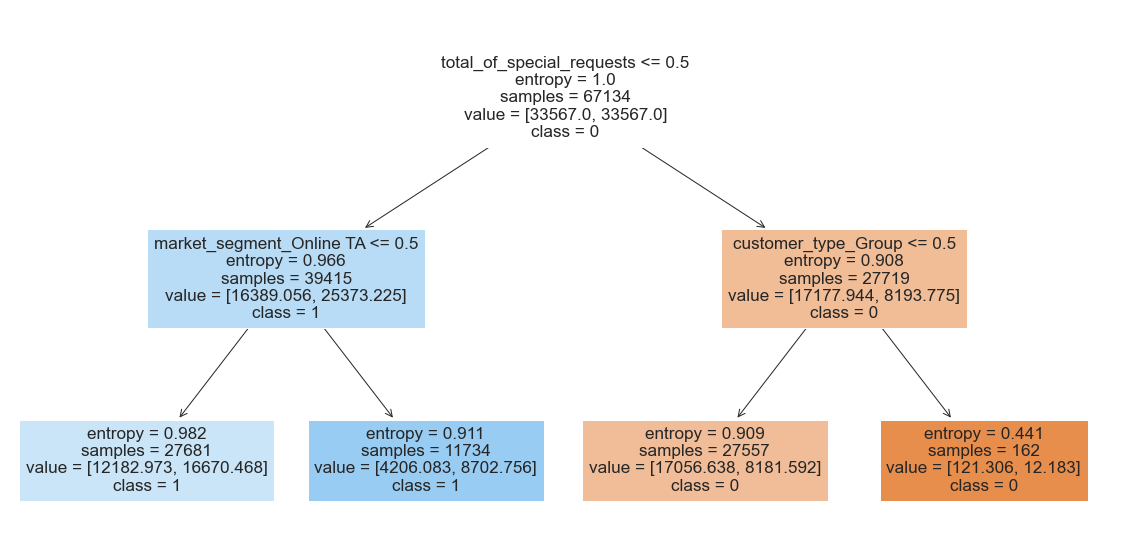

In [242]:
# Menampilkan visualisasi salah satu Tree, hanya untuk keperluan ekplorasi

# Mendapatkan nama Feature
feature_names_list = list(transformer.transformers_[0][1].get_feature_names_out()) + list(transformer.transformers_[1][1].get_feature_names_out())

# Estimator Decision Tree
estimator_instance = dt_randomsearch.best_estimator_[1]

# Decision Tree Plot
plt.figure(figsize = (20,10))
plot_tree(estimator_instance, filled = True, class_names = ["0", "1"], feature_names= feature_names_list)
plt.show()

### <font color=#DD7A4B size=+3><b>4.2.2 Hyperparameter Tuning Random Forest Classifier</b></font>

<a id="4bb"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:gray" data-toggle="popover">Table of Contents</a>

>  
>Random forest is a Supervised Machine Learning Algorithm that is used widely in Classification and Regression problems. It builds decision trees on different samples and takes their majority vote for classification and average in case of regression.
>   

Hyperparameter Random Forest Classifier
Pada hyperparameter tuning Random Forest Classifier ini, dinggunakan Randomized Search, dengan n_iter = 100 (dikarenakan komputasi yang jauh lebih berat) dan cv = 5.
Dikarenakan Random Forest Classifier ini merupakan kumpulan decision tree, maka terdapat hyperparameter yang mirip dengan Decision Tree

Hyperparameter yang digunakan:  
- n_estimators (default =100)  
Merupakan banyaknya Decision Tree yang ada pada Random Forest. `Another important parameter for random forest is the number of trees (n_estimators). Ideally, this should be increased until no further improvement is seen in the model. Good values might be a log scale from 10 to 1,000.` ( [Sumber 3](https://machinelearningmastery.com/hyperparameters-for-classification-machine-learning-algorithms/) ). Dikarenakan dibutuhkan kekuatan komputasi yang berat maka skalanya akan diubah menjadi 10, 100, 200, 500, 1000

- Max_depth (default = `None`)  
Batasan seberapa dalam `Decision Tree` dapat melakukan splitting. Jika tidak dibatasi akan melakukan splitting sampai leaf node hanya memiliki 1 kategori saja, akan tetapi model cenderung over fitting. Pada permodelan ini nilai yang digunakan adalah 1-100.  

- Min_samples_split (default = 2)  
Jumlah minimum samples yang dibutuhkan sebelum melakukan splitting. Sama seperti Decision Tree, nilai yang akan digunakan berkisar antara adalah 1 - 40.  

- Min_samples_leaf (default = 1)  
Jumlah minimum samples yang dibutuhkan pada leaf node (setelah splitting). Sama seperti Decision Tree, nilai yang akan digunakan berkisar antara adalah 1 - 20.

- Max_features (default = None)
Jumlah feature yang akan dipertimbangkan model untuk splitting. `The most important parameter is the number of random features to sample at each split point (max_features).You could try a range of integer values, such as 1 to 20, or 1 to half the number of input features` ( [Sumber 3](https://machinelearningmastery.com/hyperparameters-for-classification-machine-learning-algorithms/) ).Berdasarkan artikel ini, hyperparameter yang digunakan adalah `sqrt`, `log2`, `None` dan `5` (setengah dari jumlah feature)

- Class_weight (default = None)
Memberi weight / bias agar child node setelah di splitting agar perbandingan target lebih proposional. Mirip seperti pada Decisiton Tree hyperparameter yang digunakan adalah `balanced`, `balanced_subsample`, dan `None`


Semua Paramspace yang digunakan dapat dilihat pada cell code dibawah

Source  
Sumber 1 : https://www.analyticsvidhya.com/blog/2021/06/understanding-random-forest/  
Sumber 2 : https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html  
Sumber 3 : https://machinelearningmastery.com/hyperparameters-for-classification-machine-learning-algorithms/  

In [243]:
rf_pipe = Pipeline(
        [('transformer', transformer),
        ('model', base_forest)])

# membuat hyperparameter space Random Forest Classifier
rf_paramspace = {
    "model__n_estimators" : [5,10,100, 200, 500, 1000], 
    "model__max_depth" : range(1,101), 
    "model__min_samples_split" : range(2,41), 
    "model__min_samples_leaf" : range(1,21), 
    "model__max_features" : ["sqrt", "log2", None, 5],
    "model__class_weight" : ["balanced", "balanced_subsample", None]
}

rf_randomsearch = RandomizedSearchCV(
    estimator=rf_pipe,
    param_distributions=rf_paramspace,
    cv=5,
    scoring='recall',
    n_jobs=-1,
    random_state=0,
    n_iter=100)

# Training Random Search CV Random Forest Classifier
rf_randomsearch.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('transformer',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('Encoding',
                                                                               OneHotEncoder(drop='first'),
                                                                               ['market_segment',
                                                                                'deposit_type',
                                                                                'customer_type',
                                                                                'reserved_room_type',
                                                                                'Continent']),
                                                                              ('Scaling',
                                                                               RobustScaler(),
                                                                               ['previous_cancellations',
                                                                                'booking_changes',
                                                                                'days_in_waiting_list',
                                                                                'required_ca...
                                              RandomForestClassifier(random_state=42))]),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'model__class_weight': ['balanced',
                                                                'balanced_subsample',
                                                                None],
                                        'model__max_depth': range(1, 101),
                                        'model__max_features': ['sqrt', 'log2',
                                                                None, 5],
                                        'model__min_samples_leaf': range(1, 21),
                                        'model__min_samples_split': range(2, 41),
                                        'model__n_estimators': [5, 10, 100, 200,
                                                                500, 1000]},
                   random_state=0, scoring='recall')

In [244]:
# mendapatkan best parameter & best score dari GridSearch CV Random Forest Classifier
print("Best parameter : ", rf_randomsearch.best_params_, "\n")
print("best score : ", rf_randomsearch.best_score_)

Best parameter :  {'model__n_estimators': 5, 'model__min_samples_split': 16, 'model__min_samples_leaf': 20, 'model__max_features': 'log2', 'model__max_depth': 31, 'model__class_weight': 'balanced'} 

best score :  0.6675403957613723


In [245]:
# model default sebelum hyperparameter tuning
rf_pipe

# mendapatkan model Random Forest dengan parameter terbaik (gridsearch)
rf_bestmodel = rf_randomsearch.best_estimator_

# training model default 
rf_pipe.fit(X_train, y_train)

# training RF tuned 
rf_bestmodel.fit(X_train, y_train)

# mendapatkan hasil prediksi Random Forest default
Y_pred_class_rf_default = rf_pipe.predict(X_test)

# mendapatkan hasil prediksi RF tuned
Y_pred_class_rf_tuned = rf_bestmodel.predict(X_test)

# keluarkan recall untuk Random Forest Default dan Tuned
print("recall score RF default : ", recall_score(y_test, Y_pred_class_rf_default))
print("recall score RF tuned : ",recall_score(y_test, Y_pred_class_rf_tuned), "\n")

recall score RF default :  0.623003710275851
recall score RF tuned :  0.6649459590256493 



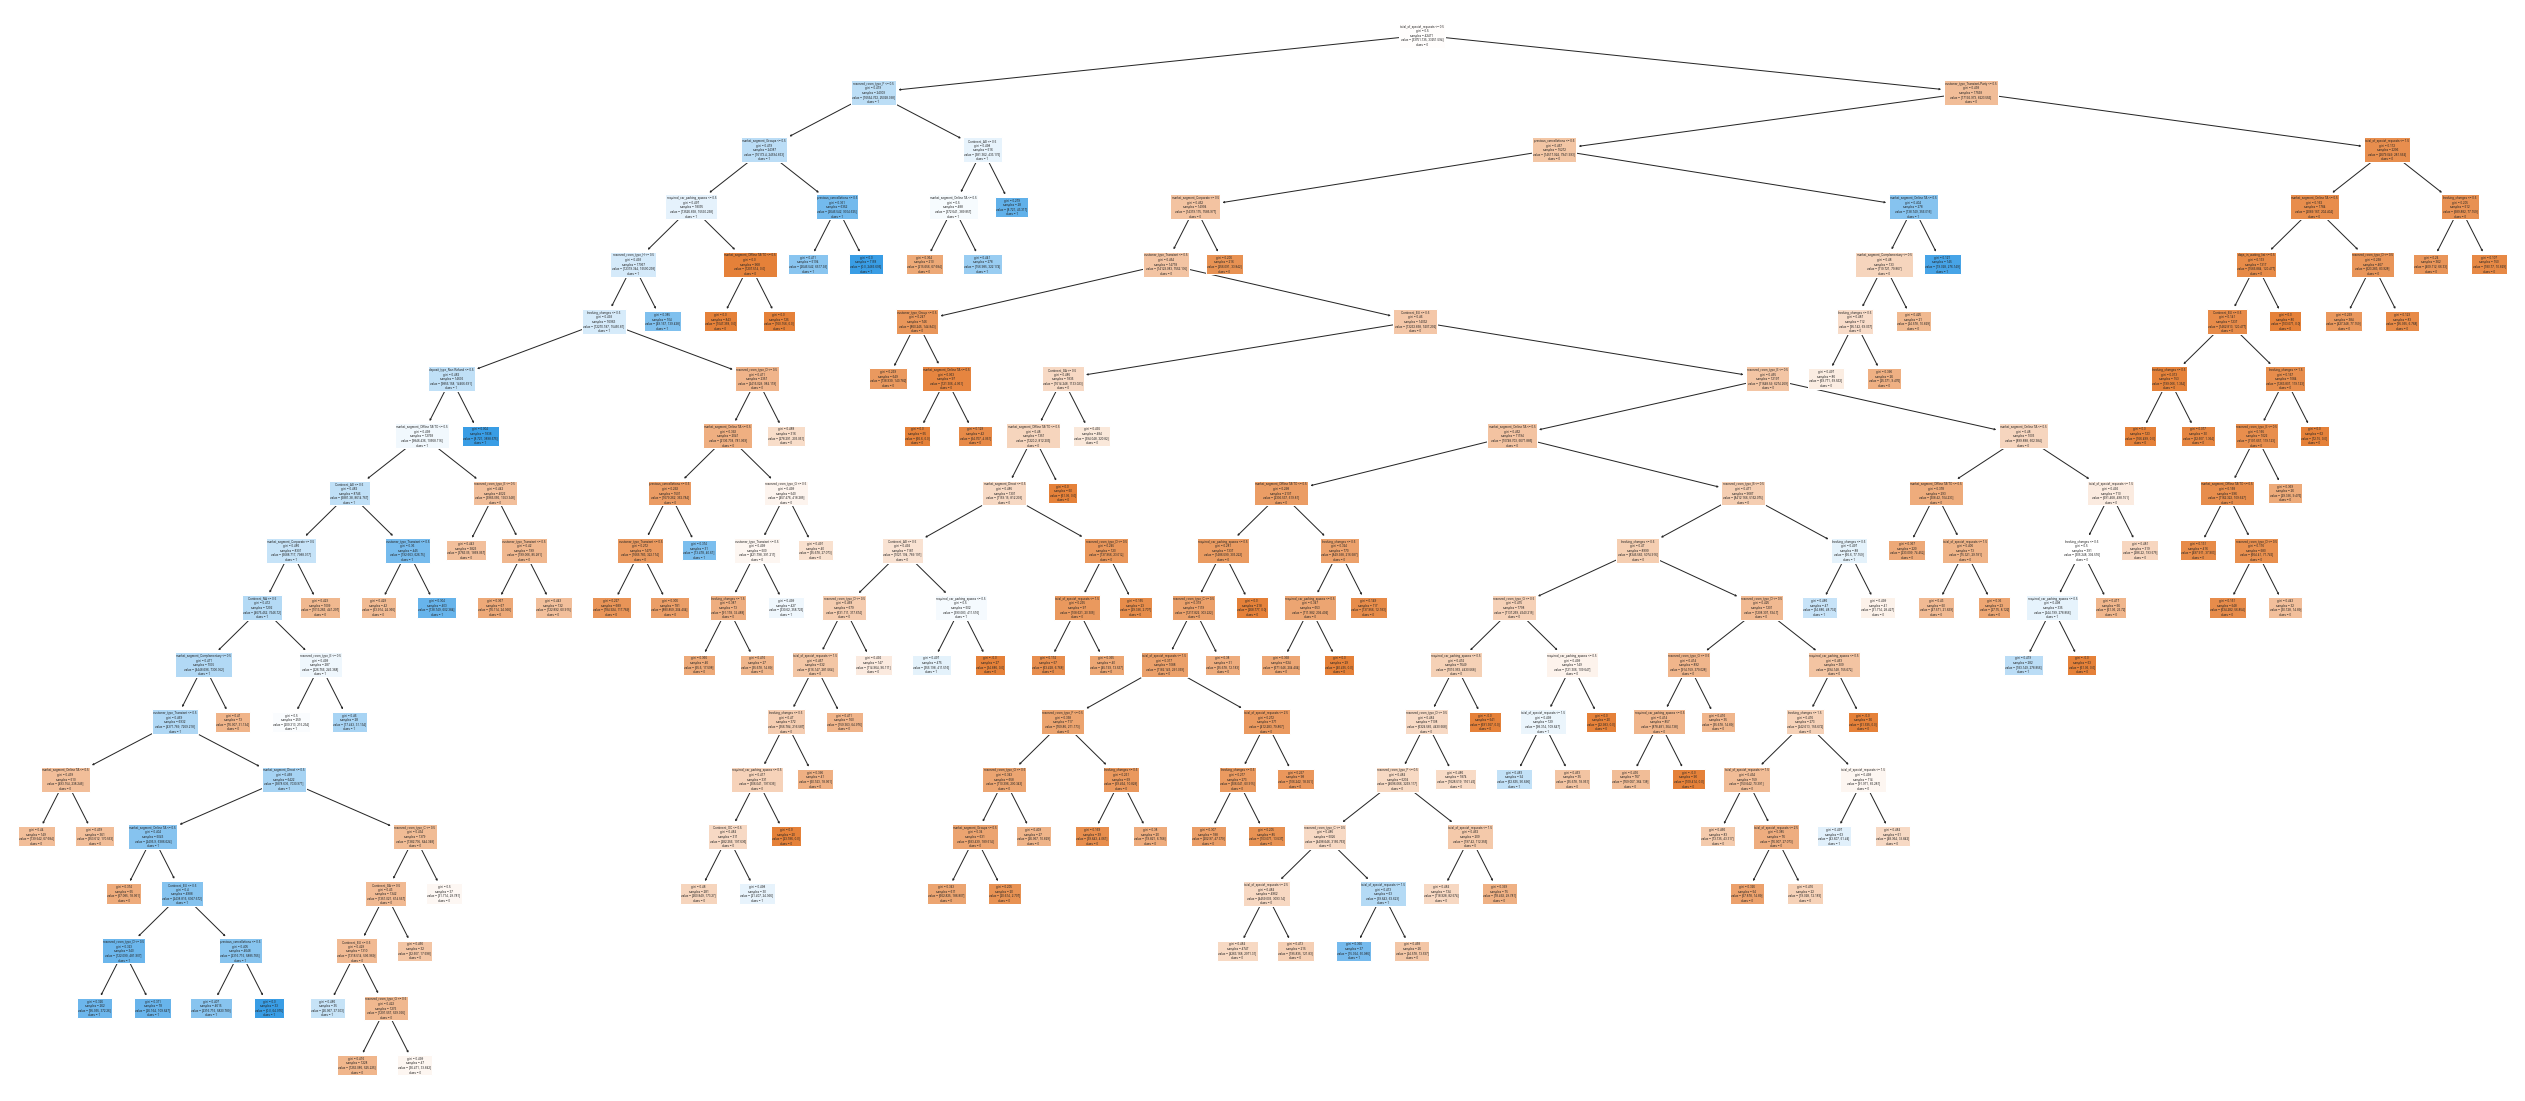

In [246]:
# Menampilkan visualisasi salah satu Tree, hanya untuk keperluan ekplorasi

# Mendapatkan nama feature
feature_names_list = list(transformer.transformers_[0][1].get_feature_names_out()) + list(transformer.transformers_[1][1].get_feature_names_out())

# mendapatkan salah satu Tree
estimator_instance = rf_randomsearch.best_estimator_[1].estimators_[-1]

# kita plotkan tree salah satu estimator yang beruntung terpilih tadi
plt.figure(figsize = (45,20))
plot_tree(estimator_instance, filled = True, class_names = ["0", "1"], feature_names = feature_names_list )
plt.show()

### <font color=#DD7A4B size=+3><b>4.2.3 Hyperparameter Tuning XGB Classifier</b></font>
<a id="4bc"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:gray" data-toggle="popover">Table of Contents</a>

>  
>The XGBoost library implements the gradient boosting decision tree algorithm. Boosting is an ensemble technique where new models are added to correct the errors made by existing models. Models are added sequentially until no further improvements can be made. Gradient boosting is an approach where new models are created that predict the residuals or errors of prior models and then added together to make the final prediction. It is called gradient boosting because it uses a gradient descent algorithm to minimize the loss when adding new models.
>   

Hyperparameter Random XGB Classifier
Pada hyperparameter tuning XGB Classifier ini, dinggunakan Randomized Search, dengan n_iter = 200 (dikarenakan komputasi yang jauh lebih berat) dan cv = 5.
Booster XGB Classifier yang digunakan adalah `Tree`, booster ini yang umumnya digunakan. Dikarenakan booster yang digunakan adalah `tree`, maka ada beberapa parameter yang mirip dengan `Decision Tree`

Hyperparameter yang digunakan:  
- Max_depth (default = 6)  
Batasan seberapa dalam tree dapat melakukan splitting. Jika tidak dibatasi akan melakukan splitting sampai leaf node hanya memiliki 1 kategori saja, akan tetapi model cenderung over fitting. Pada permodelan ini nilai yang digunakan adalah 3-10.  

- Learning Rate (default = 0.3)
Menentukan step size pembelajaran model setiap iterasi dalam mengoptimisasi model. Hyperparameter yang digunakan berkisar dari 0.1, 0.2 dan 0.3

- n_estimators (default = 100)
Banyaknya base model yang digunakan XGB Classifier. Jumlah yang digunakan pada permodelan ini adalah 10, 100, 200, 500, 1000

- Colsample_bytree (default = 1)
Merepresentasikan bagian kolom yang akan di sampling secara random untuk tiap tree, range yang dipakai 0.5, 0.6, 0.8, 1

- Subsample (default = 1)
Mewakili proporsi pengamatan yang akan dijadikan sampel untuk setiap pohon, range yang dipakai 0.5, 0.6, 0.8, 1

Semua Paramspace yang digunakan dapat dilihat pada cell code dibawah

Source  
Sumber 1 : https://machinelearningmastery.com/gentle-introduction-xgboost-applied-machine-learning/  
Sumber 2 : https://towardsdatascience.com/xgboost-fine-tune-and-optimize-your-model-23d996fab663  
Sumber 3 : https://xgboost.readthedocs.io/en/latest/parameter.html  

In [247]:
xgb_pipe = Pipeline(
        [('transformer', transformer),
        ('model', base_xgb)])

# membuat hyperparameter space XGB Classifier
xgb_paramspace = {
    "model__max_depth" : range(3,11), 
    "model__learning_rate" : [0.05, 0.1, 0.2, 0.3], 
    "model__n_estimators" : [5, 10, 100, 200, 500, 1000], 
    "model__colsample_bytree" : [0.5, 0.6, 0.8, 1],
    "model__subsample" : [0.5, 0.6, 0.8, 1]
}

xgb_randomsearch = RandomizedSearchCV(
    estimator=xgb_pipe,
    param_distributions=xgb_paramspace,
    cv=5,
    scoring='recall',
    n_jobs=-1,
    random_state=0,
    n_iter=200)

# Training Random Search CV XGB Classifier
xgb_randomsearch.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('transformer',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('Encoding',
                                                                               OneHotEncoder(drop='first'),
                                                                               ['market_segment',
                                                                                'deposit_type',
                                                                                'customer_type',
                                                                                'reserved_room_type',
                                                                                'Continent']),
                                                                              ('Scaling',
                                                                               RobustScaler(),
                                                                               ['previous_cancellations',
                                                                                'booking_changes',
                                                                                'days_in_waiting_list',
                                                                                'required_ca...
                                                            num_parallel_tree=1,
                                                            predictor='auto',
                                                            random_state=42,
                                                            reg_alpha=0,
                                                            reg_lambda=1, ...))]),
                   n_iter=200, n_jobs=-1,
                   param_distributions={'model__colsample_bytree': [0.5, 0.6,
                                                                    0.8, 1],
                                        'model__learning_rate': [0.05, 0.1, 0.2,
                                                                 0.3],
                                        'model__max_depth': range(3, 11),
                                        'model__n_estimators': [5, 10, 100, 200,
                                                                500, 1000],
                                        'model__subsample': [0.5, 0.6, 0.8, 1]},
                   random_state=0, scoring='recall')

In [248]:
# mendapatkan best parameter & best score dari GridSearch CV LogisticRegression
print("Best parameter : ", xgb_randomsearch.best_params_, "\n")
print("best score : ", xgb_randomsearch.best_score_)

Best parameter :  {'model__subsample': 0.6, 'model__n_estimators': 10, 'model__max_depth': 4, 'model__learning_rate': 0.05, 'model__colsample_bytree': 1} 

best score :  0.6245917572481445


In [249]:
# model default sebelum hyperparameter tuning
xgb_pipe

# mendapatkan model XGB dengan parameter terbaik (gridsearch)
xgb_bestmodel = xgb_randomsearch.best_estimator_

# training model default 
xgb_pipe.fit(X_train, y_train)

# training gb tuned 
xgb_bestmodel.fit(X_train, y_train)

# mendapatkan hasil prediksi XGB default
Y_pred_class_xgb_default = xgb_pipe.predict(X_test)

# mendapatkan hasil prediksi GB tuned
Y_pred_class_xgb_tuned = xgb_bestmodel.predict(X_test)

# keluarkan recall untuk XGB Default dan Tuned
print("recall score XGB default : ", recall_score(y_test, Y_pred_class_xgb_default))
print("recall score XGB tuned : ",recall_score(y_test, Y_pred_class_xgb_tuned), "\n")

recall score XGB default :  0.6191321180835618
recall score XGB tuned :  0.6305855783190837 



### <font color=#DD7A4B size=+3><b>4.2.4 Hyperparameter Tuning Summary</b></font>
<a id="4bd"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:gray" data-toggle="popover">Table of Contents</a>

**Decision Tree**  
recall score dt default :  0.6212292305210518  
recall score dt tuned :  0.7648007743184384  

*Best parameter*  
'model__min_samples_split': 38  
'model__min_samples_leaf': 10  
'model__max_features': 'log2'  
'model__max_depth': 2  
'model__criterion': 'entropy'  
'model__class_weight': 'balanced'


**Random Forest Classifier**  
recall score RF default :  0.623003710275851  
recall score RF tuned :  0.6649459590256493  

*Best parameter*  
'model__n_estimators': 5  
'model__min_samples_split': 16  
'model__min_samples_leaf': 20  
'model__max_features': 'log2'  
'model__max_depth': 31  
'model__class_weight': 'balanced'


**XGB Classifier**  
recall score XGB default :  0.6191321180835618  
recall score XGB tuned :  0.6305855783190837  

*Best parameter*  
'model__subsample': 0.6  
'model__n_estimators': 10  
'model__max_depth': 4  
'model__learning_rate': 0.05  
'model__colsample_bytree': 1

- Dari Hasil Hyperparameter tuning yang didapatkan, ternyata `Decision Tree` memiliki nilai paling baik dibandingkan model ensemble
- Bila diperhatikan, best parameter Decision Tree memiliki Max Depth = 2, yang artinya kedalam `Decision Tree` sangat pendek
- Dapat diartikan bahwa untuk dataset ini, hanya diperlukan model yang sederhana saja

## <font color=#DD7A4B size=+4><b>4.3 Feature Importance</b></font>
<a id="4c"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:gray" data-toggle="popover">Table of Contents</a>

Feature Importance  
Dari hasil sebelumnya diketahui bahwa model `Decision Tree` memiliki nilai paling tinggi. Maka model ini akan digunakan untuk feature importance

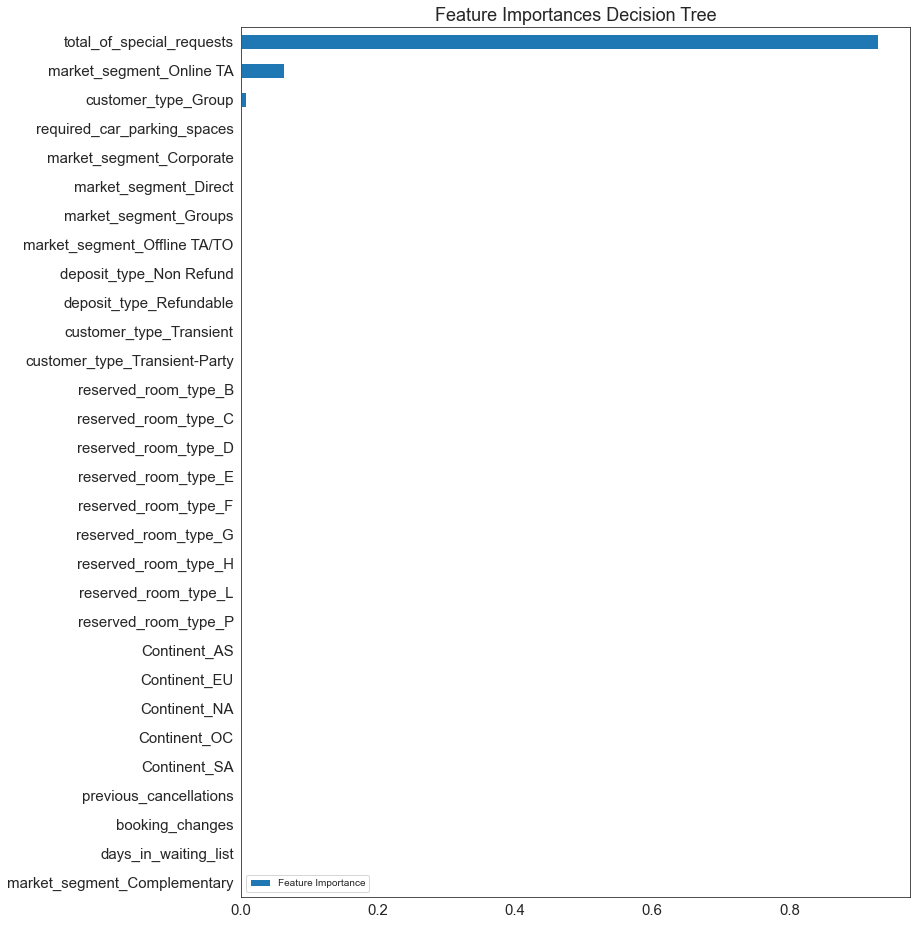

In [250]:
# mendapatkan feature names
feature_names = list(transformer.transformers_[0][1].get_feature_names_out()) + list(transformer.transformers_[1][1].get_feature_names_out())

# feature importances
fi_data = list(dt_bestmodel[1].feature_importances_)

# dibuat dalam bentuk dataframe
df__f_i = pd.DataFrame(data = fi_data, index = feature_names, columns = ["Feature Importance"]).sort_values(by = ["Feature Importance"], ascending = True)

# kita plotkan hasilnya
sns.set_style("white")
df__f_i.plot(kind = "barh", figsize = (12,16), fontsize= 15)
plt.title("Feature Importances Decision Tree", fontsize=18)
plt.show()

Dari Grafik Feature Importance diatas dapat dilihat:
- Hanya ada beberapa feature saja yang berkontribusi terhadap prediksi , yaitu `total_of_special_request`, `market_segment_Online TA`, dan `Customer_type_Group`
- Diakrenakan `Customer_type_Group` memiliki nilai feature importance sangat kecil, maka yang diambil untuk langkah selanjutnya adalah `total_of_special_request` dan `market_segment`  

Berikutnya akan dibandingkan hasil model sebelum dan sesudah future importance

### </a><font color=#DD7A4B size=+3><b>4.3.1 Best Model with Current Feature</b></font>
<a id="4ca">
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:gray" data-toggle="popover">Table of Contents</a>

Note:  
> Dikarenakan terkadang saya mendapatkan error saat menjalani bagian ini, maka permodelan akan saya lakukan manual tanpa ColumnTransformer ataupun Pipeline

In [420]:
# Mendefinisikan data
X = df.drop(columns=['is_canceled', 'country', 'a-3'])
y = df['is_canceled']

# Splitting Data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, stratify=y, random_state=42)

# Nama kolom per jenis data
cat_columns = ['market_segment','deposit_type', 'customer_type', 'reserved_room_type', 'Continent']
num_columns = ['previous_cancellations', 'booking_changes', 'days_in_waiting_list', 'required_car_parking_spaces', 'total_of_special_requests']

# Melakukan Encoding
encoder = OneHotEncoder(drop='first')                   # Mendefinisikan encoder
X_train_c = encoder.fit_transform(X_train[cat_columns]) # Encoding terhadap X_train data kategorikal
X_test_c = encoder.transform(X_test[cat_columns])       # Encoding terhadap X_test data kategorikal

# Membuat DataFrame dari hasil encoding
X_train_cat = pd.DataFrame.sparse.from_spmatrix(X_train_c, columns=encoder.get_feature_names_out()) # Sparse matrix dijadikan DataFrame
X_test_cat = pd.DataFrame.sparse.from_spmatrix(X_test_c, columns=encoder.get_feature_names_out()) # Nama kolom diambil dari encoder

# Melakukan Scaling
scaler = RobustScaler()                                 # Mendefinisikan Encoder
X_train_n = scaler.fit_transform(X_train[num_columns])  # Scaling terhadap X_train data numerikal
X_test_n = scaler.transform(X_test[num_columns])        # Scaling terhadap X_test data numerikal

# Membuat DataFrame dari hasil encoding
X_train_num = pd.DataFrame(X_train_n, columns=num_columns) # Array dijadikan DataFrame
X_test_num = pd.DataFrame(X_test_n, columns=num_columns)

# Dataframe hasil Encoding dan Scaling dijadikan 1
X_train_es = X_train_cat.join(X_train_num)
X_test_es = X_test_cat.join(X_test_num)

X_train_es.head() # Melihat data

,market_segment_Complementary,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,reserved_room_type_B,reserved_room_type_C,reserved_room_type_D,reserved_room_type_E,reserved_room_type_F,reserved_room_type_G,reserved_room_type_H,reserved_room_type_L,reserved_room_type_P,Continent_AS,Continent_EU,Continent_NA,Continent_OC,Continent_SA,previous_cancellations,booking_changes,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0


In [421]:
# Mendefinisikan model dengan parameter terbaik
dt_best = DecisionTreeClassifier(
    min_samples_split= 38,
    min_samples_leaf= 10,
    max_features= 'log2',
    max_depth= 2,
    criterion = 'entropy',
    class_weight = 'balanced',
    random_state=42
)

In [422]:
# Training Model Terhadap data train
dt_best.fit(X_train_es, y_train)

# Prediksi terhadap data test
y_pred_fibasic = dt_best.predict(X_test_es)

# Classification report 
print("Decision Tree with best parameter, No Feature Selection")
print("--"*32, "\n", classification_report(y_test, y_pred_fibasic))

Decision Tree with best parameter, No Feature Selection
---------------------------------------------------------------- 
               precision    recall  f1-score   support

           0       0.79      0.51      0.62     10585
           1       0.48      0.76      0.59      6199

    accuracy                           0.61     16784
   macro avg       0.63      0.64      0.60     16784
weighted avg       0.67      0.61      0.61     16784



c:\Users\Shendy\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:758: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
c:\Users\Shendy\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:758: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


Best Model tanpa Feature Importance
- Nilai recall sesuai dengan hasil hyperparameter : 0.76 (nilai recall pada class 1)

### <font color=#DD7A4B size=+3><b>4.3.2 Best Model after Feature Importance</b></font>
<a id="4cb"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:gray" data-toggle="popover">Table of Contents</a>

In [423]:
# Mendefinisikan kembali model awal
X_fi = df[['total_of_special_requests', 'market_segment']]
y_fi = df['is_canceled']

# Splitting Data
X_train_fi, X_test_fi, y_train_fi, y_test_fi = train_test_split(X_fi,y_fi, test_size=0.2, stratify=y, random_state=42)

# Nama kolom per jenis data
cat_columns = ['market_segment']
num_columns = ['total_of_special_requests']

# Melakukan Encoding
encoder = OneHotEncoder(drop='first')                           # Mendefinisikan encoder
X_train_cfi = encoder.fit_transform(X_train_fi[cat_columns])    # Encoding terhadap X_train data kategorikal
X_test_cfi = encoder.transform(X_test_fi[cat_columns])          # Encoding terhadap X_test data kategorikal

# Membuat DataFrame dari hasil encoding
X_train_catfi = pd.DataFrame.sparse.from_spmatrix(X_train_cfi, columns=encoder.get_feature_names_out()) # Sparse matrix dijadikan DataFrame
X_test_catfi = pd.DataFrame.sparse.from_spmatrix(X_test_cfi, columns=encoder.get_feature_names_out())   # Nama kolom diambil dari encoder

# Melakukan Scaling
scaler = RobustScaler()                                     # Mendefinisikan Encoder
X_train_nfi = scaler.fit_transform(X_train_fi[num_columns]) # Scaling terhadap X_train data numerikal
X_test_nfi = scaler.transform(X_test_fi[num_columns])       # Scaling terhadap X_test data numerikal

# Membuat DataFrame dari hasil encoding
X_train_numfi = pd.DataFrame(X_train_nfi, columns=num_columns)  # Array dijadikan DataFrame
X_test_numfi = pd.DataFrame(X_test_nfi, columns=num_columns)

# Dataframe hasil Encoding dan Scaling dijadikan 1
X_train_esfi = X_train_catfi.join(X_train_numfi)
X_test_esfi = X_test_catfi.join(X_test_numfi)

X_train_esfi.head()

,market_segment_Complementary,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,total_of_special_requests
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,2.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,2.0


In [424]:
# Mendefinisikan model dengan parameter terbaik
dt_best = DecisionTreeClassifier(
    min_samples_split= 38,
    min_samples_leaf= 10,
    max_features= 'log2',
    max_depth= 2,
    criterion = 'entropy',
    class_weight = 'balanced',
    random_state=42
)

In [425]:
# Training Model Terhadap data train
dt_best.fit(X_train_esfi, y_train)

# Prediksi terhadap data test
y_pred_fituned = dt_best.predict(X_test_esfi)

# Classification report 
print("Decision Tree with best parameter, After Feature Selection")
print("--"*32, "\n", classification_report(y_test, y_pred_fituned))

Decision Tree with best parameter, After Feature Selection
---------------------------------------------------------------- 
               precision    recall  f1-score   support

           0       0.79      0.59      0.68     10585
           1       0.51      0.73      0.60      6199

    accuracy                           0.64     16784
   macro avg       0.65      0.66      0.64     16784
weighted avg       0.69      0.64      0.65     16784



c:\Users\Shendy\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:758: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
c:\Users\Shendy\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:758: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


Best Model setelah Feature Importance
- Nilai recall setelah Feature Selection sebesar: 0.73 (nilai recall pada class 1)

### <font color=#DD7A4B size=+3><b>4.3.3 Feature Importance Summary</b></font>
<a id="4cc"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:gray" data-toggle="popover">Table of Contents</a>

In [426]:
# print default classification report to validate custom dataframe class.report
print("\n\nDefault classification report to validate dataframe above")
print("--"*32)
print("Decision Tree Best model - No Feature Selection")
print("--"*32)
print(classification_report(y_test, y_pred_fibasic), "\n\n")

print("--"*32)
print("Decision Tree Best model - With Feature Selection")
print("--"*32)
print(classification_report(y_test_fi, y_pred_fituned))



Default classification report to validate dataframe above
----------------------------------------------------------------
Decision Tree Best model - No Feature Selection
----------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.79      0.51      0.62     10585
           1       0.48      0.76      0.59      6199

    accuracy                           0.61     16784
   macro avg       0.63      0.64      0.60     16784
weighted avg       0.67      0.61      0.61     16784
 


----------------------------------------------------------------
Decision Tree Best model - With Feature Selection
----------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.79      0.59      0.68     10585
           1       0.51      0.73      0.60      6199

    accuracy                           0.64     16784
   macro avg       0.65      0.66 

Summary
- Classifier yang digunakan adalah Decision Tree yang telah melalui proses seleksi via Hyperparameter Tuning
- Terdapat perbedaan tipis antara permodelan menggunakan semua fitur dan 2 fitur saja, sebanyak 0.03
- Fitur `Customer Type` tidak digunakan karena hanya berkontribusi sedikit  

Fitur yang digunakan :
1. 'total_of_special_requests'
2. 'market_segment'

# <font color=#DD7A4B size=+5><b>5. Conclusion & Recommendation</b></font>
<a id="5"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:gray" data-toggle="popover">Table of Contents</a>

**Summary**  
Booking Cancel merupakan fenomena yang tidak asing di industri Hospitality, akan tetapi fenomena ini bertambah banyak di beberapa tahun belakangan. Bertambah banyaknya fenomena ini disebabkan oleh beberapa faktor, yaitu:  
- Bertambah mudahnya pelanggan melakukan proses booking dan juga booking cancel yang dilakukan melalui OTA (Online Travel Agencies). Pelanggan hotel tidak lagi berinteraksi dengan pegawai hotel, melainkan berinteraksi dengan website atau aplikasi.  
- Diskon yang diberikan oleh OTA membuat pelanggan booking cancel dan memilih alternatif yang lebih murah. Hal ini termasuk, pelanggan yang tadinya membooking secara langsung, pindah booking melalui OTA yang mana hal OTA juga akan memberi fee kepada hotel.

Besarnya Booking Cancel dapat dilihat pada ratio data sebesar : Booking tidak cancel(0) = 63.1723% & Booking Cancel(1) = 36.8277%. Walaupun sulit diukur secara langsung, akan tetapi hal ini merugikan pihak hotel dimana hotel tidak dapat menjual jasanya kepada calon pelanggan yang benar - benar ingin membeli jasanya. Terlebih jika booking cancel terjadi pada hari H penempatan kamar, sudah hampir pasti 1 kamar tersebut akan kosong pada malam itu. Ada beberapa kebijakan untuk mencegah hal ini terjadi, akan tetapi cara yang ada dianggap kurang efektif.

**Conclusion**  
Dengan adanya analisa ini, kita dapat memprediksi pelanggan mana yang sekiranya akan booking cancel ataupun tidak. Pelaku industri perhotelan memiliki lebih banyak tools yang bisa digunakan dalam menghadapi hal ini.

In [430]:
print("Decision Tree Best model - With Feature Selection\n", "--"*32)
print(classification_report(y_test_fi, y_pred_fituned))

Decision Tree Best model - With Feature Selection
 ----------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.79      0.59      0.68     10585
           1       0.51      0.73      0.60      6199

    accuracy                           0.64     16784
   macro avg       0.65      0.66      0.64     16784
weighted avg       0.69      0.64      0.65     16784



- Nilai recall yang dihasilkan oleh model ini sebesar 0.73, yang artinya model ini dapat memprediksi 73% persen pelanggan mana yang akan booking cancel
- Tidak semua data yang ada berkontribusi pada permodelan ini, bahkan hanya 2 data yaitu 'market segment' dan 'total of special request'
- 'Total of special request` merupakan faktor penentu terbesar dalam prediksi Cancel Booking (90% lebih)

**Recommendation**  
1. Penambahan Data. Dalam rangka meningkatkan performa model ini, langkah yang paling efektif adalah menambah jumlah data dan juga keberagaman data. Kebanyakan data numerikal pada dataset ini, memiliki nilai 0  
2. Membuat kontrak atau peraturan dengan Travel Agent baik yang offline maupun online, memungkinkan untuk merendahkan angka cancel booking  
3. Dengan adanya tools prediksi ini, pelaku industri perhotelan dapat mencegah cancel booking dengan memberikan diskon atau layanan lebih kepada pelanggan calon cancel booking  
4. Dapat menyesuaikan ketentuan booking sesuai dari feature - feature prediksi cancel booking

# <font color=#DD7A4B size=+5><b>6. Deployment</b></font>
<a id="6"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:gray" data-toggle="popover">Table of Contents</a>

**Deployment Preparation**  
Memastikan kembali permodelan menggunakan hyperparameter tuning sebelum pickle

In [441]:
# Mendefinisikan kembali model awal
X_fi = df[['total_of_special_requests', 'market_segment']]
y_fi = df['is_canceled']

# Encoding dan Scaling menggunakan transformer
transformer = ColumnTransformer([
    ('Encoding', OneHotEncoder(drop='first') ,['market_segment']),
    ('Scaling', RobustScaler() ,['total_of_special_requests']),
], remainder='passthrough')

dt_best = DecisionTreeClassifier(
    min_samples_split= 38,
    min_samples_leaf= 10,
    max_features= 'log2',
    max_depth= 2,
    criterion = 'entropy',
    class_weight = 'balanced',
    random_state=42
)

# Mendefinisikan kembali pipeline
dt_pipe = Pipeline(
        [('transformer', transformer),
        ('model', base_dt)])

# membuat hyperparameter space Decision Tree
dt_paramspace = {
    "model__criterion" : ['gini','entropy','log_loss'],
    "model__max_depth" : range(1,101), 
    "model__min_samples_split" : range(2,41), 
    "model__min_samples_leaf" : range(1,21), 
    "model__max_features" : ["sqrt", "log2", None],
    "model__class_weight" : ["balanced", None]
}

dt_randomsearch = RandomizedSearchCV(
    estimator=dt_pipe,
    param_distributions=dt_paramspace,
    cv=5,
    scoring='recall',
    n_jobs=-1,
    random_state=0,
    n_iter=500)

# Training Random Search CV Decision Tree
dt_randomsearch.fit(X_fi, y_fi)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('transformer',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('Encoding',
                                                                               OneHotEncoder(drop='first'),
                                                                               ['market_segment']),
                                                                              ('Scaling',
                                                                               RobustScaler(),
                                                                               ['total_of_special_requests'])])),
                                             ('model',
                                              DecisionTreeClassifier(random_state=42))]),
                   n_iter=500, n_jobs=-1,
                   param_distributions={'model__class_weight': ['balanced',
                                                                None],
                                        'model__criterion': ['gini', 'entropy',
                                                             'log_loss'],
                                        'model__max_depth': range(1, 101),
                                        'model__max_features': ['sqrt', 'log2',
                                                                None],
                                        'model__min_samples_leaf': range(1, 21),
                                        'model__min_samples_split': range(2, 41)},
                   random_state=0, scoring='recall')

In [443]:
# mendapatkan best parameter & best score dari Random Search Decision Tree
print("Best parameter : ", dt_randomsearch.best_params_, "\n")
print("best score : ", dt_randomsearch.best_score_)

Best parameter :  {'model__min_samples_split': 4, 'model__min_samples_leaf': 10, 'model__max_features': None, 'model__max_depth': 1, 'model__criterion': 'gini', 'model__class_weight': 'balanced'} 

best score :  0.7576783456228633


**Kesimpulan**  
terdapat sedikit perbedaan antara parameter ketika data dipecah dan ketika data utuh, maka akan saya ambil nilai yang lebih tinggi yaitu Decision Tree dengan parameter:  
- min_samples_split: 4  
- min_samples_leaf: 10  
- max_features: None  
- max_depth: 1  
- criterion: 'gini'  
- class_weight: 'balanced' 


**Save Model**  
Model di Pickling dalam format sav

In [453]:
# penamaan file pickle
filename = "Shendy_JCDS1702_pickle.sav"

# export .sav sebagai file
pickle.dump(dt_randomsearch.best_estimator_, open(filename, "wb"))

**Load Model**  
Mengetes Kembali model yang telah di pickle

In [462]:
# nama file pickle
filename = "Shendy_JCDS1702_pickle.sav"

# perintah untuk load model
loaded_model = pickle.load(open(filename, "rb"))

In [460]:
# Create df for dummy

data_for_dummy = df[['total_of_special_requests', 'market_segment', 'is_canceled']]
df_dummy = data_for_dummy.sample(10)
df_dummy

,total_of_special_requests,market_segment,is_canceled
15584,2,Online TA,0
49937,3,Offline TA/TO,0
4124,0,Online TA,0
71944,1,Online TA,0
75771,0,Groups,1
41110,1,Online TA,0
78603,1,Offline TA/TO,0
10017,1,Online TA,0
68107,0,Groups,1
599,2,Online TA,0


In [467]:
# Define X dan y untuk dummy 
X_dummy = df_dummy[['total_of_special_requests', 'market_segment']]
y_dummy = df_dummy['is_canceled']

# predict that data
print("predict class :",loaded_model.predict(X_dummy))

Y_predict_dummy = loaded_model.predict(X_dummy)
print("\n",classification_report( y_dummy,Y_predict_dummy))

predict class : [0 0 1 0 1 0 0 0 1 0]

               precision    recall  f1-score   support

           0       1.00      0.88      0.93         8
           1       0.67      1.00      0.80         2

    accuracy                           0.90        10
   macro avg       0.83      0.94      0.87        10
weighted avg       0.93      0.90      0.91        10



Model berjalan dengan baik